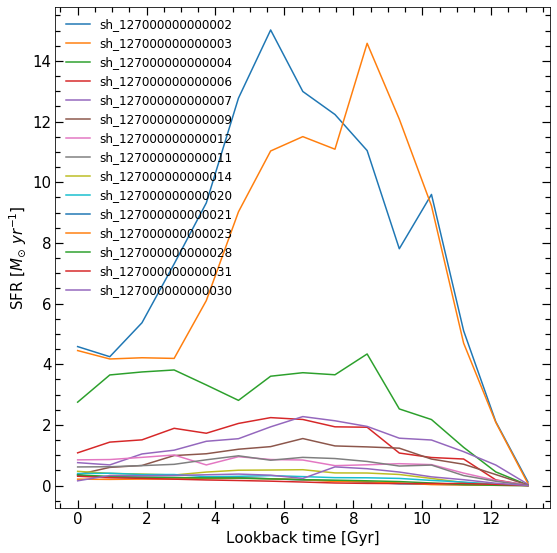

In [2]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as times
import bines2 as bines

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.98,top=0.97)

nbin = 15
time = np.linspace(0,14,nbin+1)
SFR = np.zeros(nbin)
    
ID = np.loadtxt('../_data/my_halos.dat')[:,0]
 
path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in range(15):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]

    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = times.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]
    
    
    
    limit = np.where(rstr < rgal)

    mstr = mstr[amask][limit]*1e10/h
    age = age[limit]
    
    for i in range(nbin):
        mask,= np.where((time[i] < age) & (age < time[i+1]))
        dt = time[i+1]-time[i]
        Mtot = np.sum(mstr[mask])
        
        SFR[i]  = Mtot/(dt*1e9)
    
    ax.plot(time[:-1],SFR, ls='-', label='sh_'+str('%d'%ID[j]))

ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
# ax.set_xlim(0,14)
ax.set_ylabel('SFR [$M_{\odot}$ $yr^{-1}$]',fontsize=15)
ax.set_xlabel('Lookback time [Gyr]',fontsize=15)
ax.legend(fontsize=12,frameon=False)

fig.savefig('../_imagenes/SFR.png',dpi=100, xxbox_inches='tight')